## Visualización de datos

### Recoge la base de datos ya limpiada, para realizar visualizaciones conforme a los objetivos definidos

In [7]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_seq_items', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pylab as plt
import seaborn as sns

In [8]:
shark = pd.read_csv(r"\Users\ccior\IRONHACK\Proyectos\01-w2-pandas-Carlos-Ciordia\src\clean_shark.csv", encoding="ISO-8859-1")

In [9]:
shark.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Activity_clean,Dead or alive
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,Water sports,0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,Water sports,0
2,2018.06.09,09-Jun-2018,2018.0,Other,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,Surfing,0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,Surfing,0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,Diving,0
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris Â,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN,Surfing,0
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN,Bathing,1
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,Fishing,0
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN,Water sports,0
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN,Water sports,0


## DEATH RATIO DEPENDING ON THE ACTIVITY

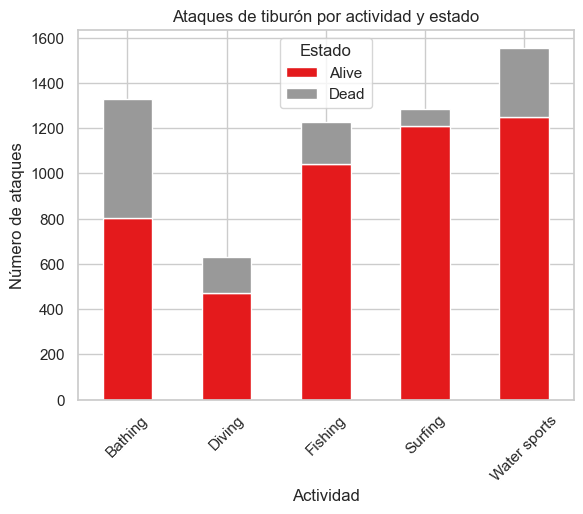

In [10]:
# Primero, necesitas calcular las 5 actividades más comunes.
top_activities = shark["Activity_clean"].value_counts().nlargest(5).index

# Filtra el DataFrame para incluir solo las filas con las 5 actividades más comunes.
shark_filtered = shark[shark["Activity_clean"].isin(top_activities)]

# Ahora, agrupa los datos por 'activity' y 'dead or alive' y cuenta las ocurrencias.
data = shark_filtered.groupby(["Activity_clean", 'Dead or alive']).size().unstack()

# Crea un gráfico de barras apilado.
ax = data.plot(kind='bar', stacked=True, colormap='Set1')

# Personaliza el gráfico.
plt.title('Ataques de tiburón por actividad y estado')
plt.xlabel('Actividad')
plt.ylabel('Número de ataques')
plt.legend(title='Estado', labels=['Alive', 'Dead'])
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para una mejor legibilidad.

plt.savefig("../img/graph1.png") #Exporta a la carpeta img como "graph1"

# Muestra el gráfico.
plt.show()

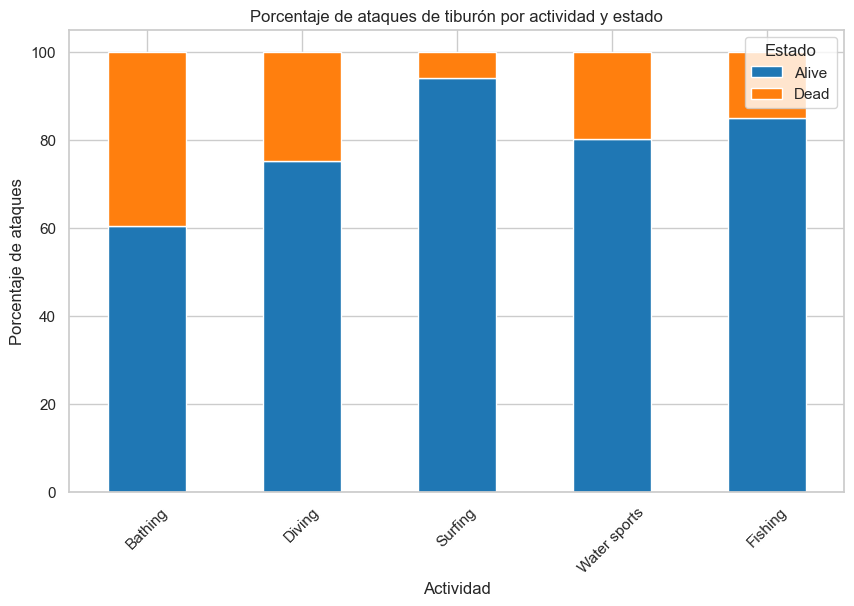

In [11]:

# Primero, necesitas calcular las actividades con más ataques, ordenadas de mayor a menor.
top_activities = shark['Activity_clean'].value_counts().nlargest(5).index

# Filtra el DataFrame para incluir solo las filas con las actividades más comunes.
shark_filtered = shark[shark['Activity_clean'].isin(top_activities)]

# Ahora, agrupa los datos por 'Activity_clean' y 'dead or alive' y cuenta las ocurrencias.
data = shark_filtered.groupby(['Activity_clean', 'Dead or alive']).size().unstack()

# Calcular el porcentaje de 'dead' y 'alive' para cada actividad.
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# Define una paleta de colores personalizada con 'dead' en rojo y 'alive' en azul.
colors = ['#1f77b4', '#ff7f0e']  # Azul para 'alive', rojo para 'dead'.

# Establece un estilo personalizado de Seaborn.
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette(colors))

# Ordena las actividades de mayor a menor número de ataques.
data_percentage = data_percentage.reindex(data_percentage.mean(axis=1).sort_values(ascending=False).index)

# Crea el gráfico de barras apiladas con Seaborn.
ax = data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personaliza el gráfico.
plt.title('Porcentaje de ataques de tiburón por actividad y estado')
plt.xlabel('Actividad')
plt.ylabel('Porcentaje de ataques')
plt.legend(title='Estado', labels=['Alive', 'Dead'])
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para una mejor legibilidad.

plt.savefig("../img/graph2.png") #Exporta a la carpeta img como "graph2"

# Muestra el gráfico.
plt.show()

## Percentage distribution of attack type by gender

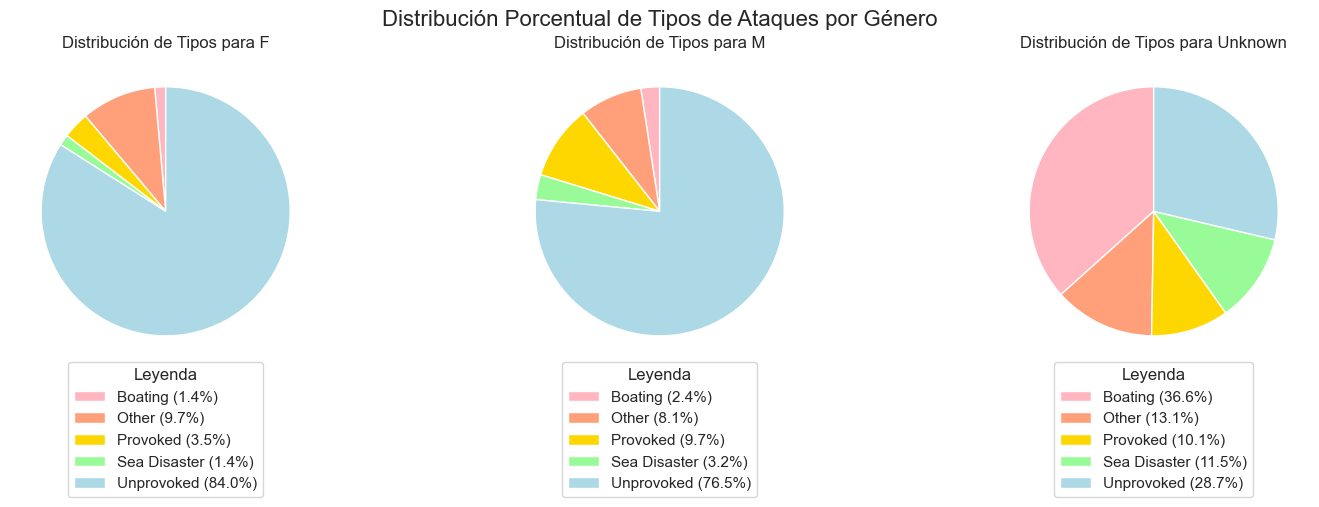

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado shark

# Calcula la tabla de contingencia con los porcentajes
contingency_table = pd.crosstab(shark["Sex"], shark["Type"], normalize="index") * 100

# Genera el gráfico de pastel para cada género
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Define una paleta de colores pastel personalizada
pastel_colors = ['#FFB6C1', '#FFA07A', '#FFD700', '#98FB98', '#ADD8E6', '#9370DB', '#F08080']

for i, gender in enumerate(contingency_table.index):
    pie, _ = axes[i].pie(contingency_table.loc[gender], startangle=90, colors=pastel_colors)
    axes[i].set_ylabel('')  # Elimina la etiqueta de la columna "Type"
    axes[i].set_title(f'Distribución de Tipos para {gender}')

    labels = [f'{t} ({p:.1f}%)' for t, p in zip(contingency_table.columns, contingency_table.loc[gender])]
    legend = axes[i].legend(pie, labels, loc="center", bbox_to_anchor=(0.5, -0.2), title="Leyenda")
    legend.get_title().set_fontsize('12')  # Ajusta el tamaño de la fuente del título de la leyenda

plt.suptitle("Distribución Porcentual de Tipos de Ataques por Género", fontsize=16)

plt.tight_layout()  # Ajusta automáticamente el espaciado para evitar que la leyenda se corte

plt.savefig("../img/graph3.png", bbox_inches='tight', pad_inches=0.2)  # Exporta a la carpeta img sin cortar la leyenda

plt.show()  # Muestra la gráfica



## US Sharks attacks by activity and area

In [21]:
unique_areas_usa = shark[shark['Country'] == 'USA']['Area'].unique()
print(unique_areas_usa)

['California' 'Georgia' 'Hawaii' 'Florida' 'South Carolina' 'New York'
 'Texas' 'Massachusetts' 'New Jersey' 'Washington' 'Oregon' 'Alabama'
 'North Carolina' 'Maryland' 'Louisiana' 'Delaware' 'Palmyra Atoll'
 'Puerto Rico' 'Maine' 'Virginia' 'US Virgin Islands' 'Kentucky' 'Guam'
 'New Mexico' 'South Carolina ' 'Johnston Atoll' 'Alaska' 'Missouri'
 'Mississippi' 'North Carolina ' 'Rhode Island' 'North & South Carolina'
 'Florida ' nan 'Connecticut' 'Pennsylvania' 'Illinois' 'Wake Island'
 ' North Carolina' 'Midway Atoll' 'East coast' ' New Jersey' 'New York '
 'CUBA']


In [22]:
#Lista de agrupado según East Coast

East_Coast = ['Georgia','Hawaii','Florida', 'South Carolina', 'Massachusetts','New Jersey', 'Washington', 'North Carolina', 'Maryland', 'Delaware', 'Maine', 'Virginia', 'New York', 'Kentucky', 'South Carolina ', 'Rhode Island', 'North & South Carolina' 
, 'Pennsylvania', 'Connecticut', ' North Carolina', 'East coast', ' New Jersey', 'New York ', 'North Carolina ']

In [23]:
#Lista de agrupado según West Coast

West_Coast = ['California', 'Oregon', 'Palmyra Atoll', 'Guam', 'New Mexico', 'Johnston Atoll', 'Alaska', 'Wake Island', 'Midway Atoll']

In [24]:
#Lista de agrupado según Golfo de méxico

Gulf_of_Mexico = ['Texas', 'Alabama', 'Louisiana', 'Missouri', 'Mississippi', 'Florida ']

In [25]:
#Lista de agrupado según Mar Caribe

Caribbean_sea = ['Puerto Rico', 'US Virgin Islands', 'CUBA']

In [26]:
#Columna nueva para los tiburones americanos

us_shark = shark[shark["Country"] == "USA"].copy()

In [27]:
def asignar_grupo(area):
    if area in East_Coast:
        return 'East Coast'
    elif area in West_Coast:
        return 'West Coast'
    elif area in Gulf_of_Mexico:
        return 'Gulf of Mexico'
    elif area in Caribbean_sea:
        return 'Caribbean_sea'
    else:
        return 'Unknown'  # Para áreas no incluidas en ninguna lista

In [28]:
us_shark['Grupo'] = us_shark['Area'].apply(asignar_grupo)

In [29]:
us_shark.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Activity_clean,Dead or alive,Grupo
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,Water sports,0,West Coast
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,Water sports,0,East Coast
2,2018.06.09,09-Jun-2018,2018.0,Other,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,Surfing,0,East Coast
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,Fishing,0,East Coast
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN,Water sports,0,East Coast
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN,Water sports,0,East Coast
11,2018.05.21,21-May-2018,2018.0,Unprovoked,USA,South Carolina,"Isle of Palms, Charleston County",Boogie boarding,Trey de Boer,M,10,Injuries to lower right leg and foot,N,NaN,NaN,"C. Creswell, GSAF",2018.05.21-deBoer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.21,2018.05.21,6292.0,NaN,NaN,Water sports,0,East Coast
12,2018.05.13.b,13-May-2018,2018.0,Unprovoked,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Jei Turrell,M,10,Severe bite to right forearm,N,15h00,NaN,"C. Creswell, GSAF & K. McMurray TrackingSharks...",2018.05.13.b-Turrell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.b,2018.05.13.b,6291.0,NaN,NaN,Bathing,0,East Coast
25,2018.04.19,19-Apr-2018,2018.0,Unprovoked,USA,Hawaii,"ShipwreckÂs Beach, Keoneloa Bay, Kauai",Body boarding,Dylan McWilliams,M,29,Lacerations to right lower leg,N,NaN,6' shark,"The Garden Island, 4/19/2018",2018.04.19-McWilliams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.19,2018.04.19,6278.0,NaN,NaN,Water sports,0,East Coast
35,2018.03.31,31-Mar-2018,2018.0,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,25,Injuries to right leg & hand,N,09h30,"Tiger shark, 12'","Khon2, 3/31/2018",2018.03.31-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/

<Figure size 1800x700 with 0 Axes>

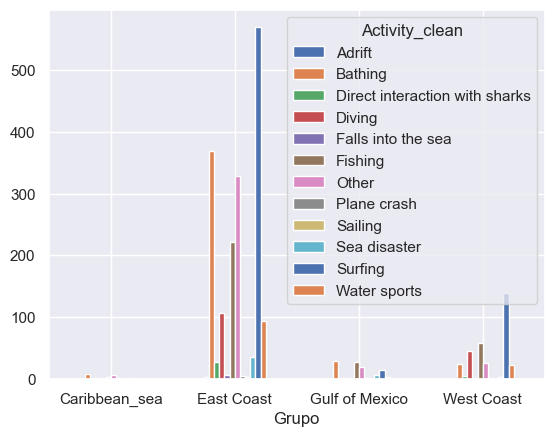

In [40]:

# Filtrar filas con 'Grupo' y 'Activity' conocidos
grupo_activity = us_shark[(us_shark['Grupo'] != 'Unknown') & (us_shark['Activity_clean'] != 'Unknown')]

# Establecer el tamaño de la figura
plt.figure(figsize=(18, 7))

# Crear un gráfico de barras para contar las actividades en cada grupo
sns.set()
grupo_activity_plot = grupo_activity.groupby(['Grupo', 'Activity_clean'])['Activity_clean'].count().unstack().plot(kind='bar')
plt.xticks(rotation=0)

plt.savefig("../img/graph4.png") #Exporta a la carpeta img como "graph4"

plt.show()